## Training - Validation - Test

- Training Set은 모델 building에 사용
- Test Set은 모델 평가에 사용 
- Validation Set은 모델이 제대로 만들어지고 있는지 중간중간 체크
- 일반적으로 6 : 2 : 2 비율로 사용

## Validation Set

- Test Set은 Model이 생성될 때 절대 Training Set에 포함되지 않아야 함
- Test Set과 달리 Model 생성시 Model의 성능을 평가하기 위해 사용
- Hyper Parameter Tuning시 성능 평가를 통해 Overfitting 방지
- Training 중간에 Model의 성능을 점검

## K-fold cross validation

- 학습 데이터를 K번 나눠서 Test와 Train을 실시 -> Test의 평균값을 사용
- 모델의 Parameter 튜닝, 간단한 모델의 최종 성능 측정 등 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/kwon-yong-geun/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [20]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):  # 일반적으로 index값을 찍음
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830231, 34.078246209259284)

## K-fold Cross Validation

- cross_val_score 함수로, 한번에 해결 가능
- sklearn은 pipeline 등을 위해 High is better로 처리함 -> MSE를 Negative로 변환
- 이로 인해 RMSE를 지원하지 않음

- 주로 cross_val_score 사용함.

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830231, -34.078246209259284)

In [23]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.00771308, 0.00414896, 0.00329781, 0.00377703, 0.00230289,
        0.001724  , 0.00209284, 0.00196981, 0.00358677, 0.00202084]),
 'score_time': array([0.00912404, 0.00213194, 0.00284624, 0.00166106, 0.00106215,
        0.00167918, 0.00101113, 0.00157619, 0.00177813, 0.00212312]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

## Leave One Out (LOO)

- Simple cross validation -> k = data size
- 한번에 한 개의 데이터만 Test set으로 사용함 -> 총 k번의 iteration
- 거의 사용하지는 않음

In [26]:
from sklearn.model_selection import LeaveOneOut

test = [1,2,3,4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print('%s %s' % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [27]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049338, -23.86283631720997)

## Check variation of cross validation

In [28]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

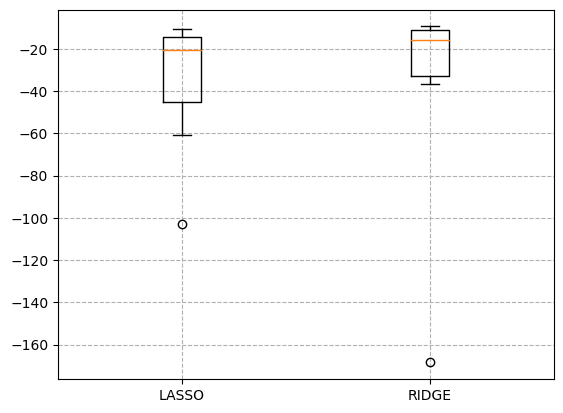

In [29]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

- 높을수록 성능이 좋은 것이기 때문에, Ridge와 LASSO의 성능에는 큰 차이가 없어보인다.
- 하지만 LASSO가 Ridge에 비해 퍼져있다. (variation이 크다) -> 정확한 값을 낼 필요가 있는 경우 (성능보다는 정확한 값이 필요할 때) Ridge를 선택하는 것이 좋음

## Validation set for parameter tuning

- Validation set의 많은 이유중 하나가 Hyper parameter tuning임
- Number of iterations (SGD), Number of branch (Tree- based) etc..
- Validation set의 성능으로 최적의 parameter을 찾음
- Validation set 결과와 Training set 결과의 차이가 벌어지면 Overfitting임

In [30]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [102]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.0000001 
max_iter = 10000

In [103]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")  # warm_start - 이전에 학습했던 값을 기반으로 학습함, learning_rate = 'constant' - learning_rate를 변화하지 않음 (거의 사용 X)

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)    

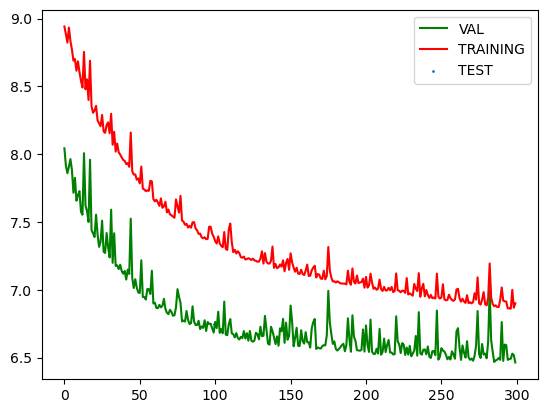

In [104]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="g", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [105]:
# 299번째 coef가 가장 좋은 coef임
np.argsort(rmse_val_score)

array([299, 285, 291, 271, 286, 294, 263, 289, 269, 287, 248, 256, 254,
       295, 296, 259, 270, 280, 288, 276, 243, 266, 268, 255, 249, 242,
       230, 272, 234, 246, 298, 226, 253, 210, 237, 228, 258, 278, 218,
       240, 275, 219, 206, 205, 297, 279, 231, 208, 236, 223, 265, 217,
       216, 213, 202, 211, 190, 204, 284, 199, 252, 257, 244, 186, 245,
       196, 251, 232, 181, 195, 194, 197, 238, 239, 182, 180, 167, 207,
       170, 169, 250, 163, 227, 168, 262, 183, 241, 152, 171, 156, 229,
       155, 142, 273, 264, 173, 184, 293, 172, 201, 187, 214, 136, 292,
       225, 222, 140, 277, 178, 185, 135, 159, 224, 146, 161, 162, 281,
       125, 179, 221, 158, 267, 193, 124, 122, 126, 283, 215, 148, 116,
       129, 189, 212, 120, 118, 115, 153, 139, 113, 117, 192, 141, 131,
       233, 132, 149, 174, 108, 107, 112, 128, 177, 111, 105, 121, 114,
       103, 127,  99, 160, 260, 144, 138, 119,  94, 123, 157, 134, 198,
       104,  90, 209,  98, 164, 143, 261, 101,  92, 154, 137, 13

In [106]:
# 가장 잘 예측한 값
model_list[299].predict(X_test)

array([26.92968767, 28.39719775, 21.73108202, 19.20442261, 21.92471032,
       22.6728819 , 18.5649624 , 15.44080224, 25.93183368, 22.37226236,
       19.59007695, 20.49175445, -9.40285211, 19.90744875, 23.31487215,
       23.39695151, 18.73098164,  9.43701259, 32.68490233, 21.96599477,
       21.38209072, 25.00815479, 16.17704534, 24.67807693, 21.15159374,
       19.7488738 , 20.35411021,  8.18404882, 20.72165016, 21.17626696,
       22.33108387, 24.69789275, 25.1715351 , 27.98372078, 17.01606306,
       16.698802  , 28.16908508, 21.46517404, 18.01812526, 16.91490599,
       15.32355198, 30.06880084, 33.84441126, 18.51007062, 24.75514609,
       22.5106611 , 19.81161857, 17.99164426, 22.0957661 , 29.31417349,
       23.63692719, 25.54726031, 20.55870065, 27.77031604, 28.59485721,
       22.37400072, 23.86107149, 32.22622522, 21.7758452 , 19.37388938,
       24.41490284, 31.29397537, 22.37631916, 14.89527115, 29.62103578,
       16.64808968, 22.88746143, 24.62681896, 29.82435554,  7.35

In [107]:
rmse(y_test,sgd_regressor.predict(X_test))

6.744454269941224

In [109]:
# 더 좋은 rmse
rmse(y_test,model_list[299].predict(X_test))

6.709700490095028

In [111]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.001 
max_iter = 100

In [112]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")  # warm_start - 이전에 학습했던 값을 기반으로 학습함, learning_rate = 'constant' - learning_rate를 변화하지 않음 (거의 사용 X)

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)  

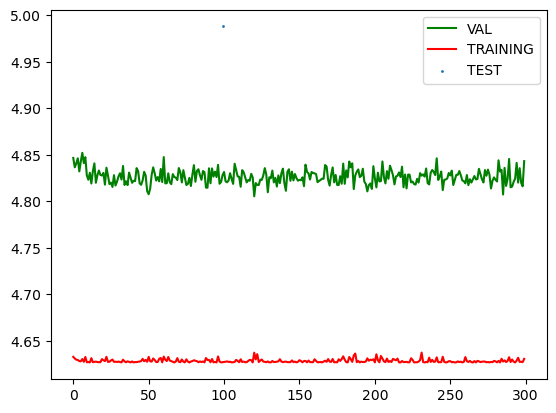

In [113]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="g", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

- scaled data에서 전체적으로 더 낮은 rmse

## Etc

- Repeated-K-Fold : 중복이 포함된 K-Fold 생성
- LeavePOut : 한번에 P개를 뽑은 (Not LOO for one data)
- ShuffleSplit : 독립적인 (중복되는 ) 데이터 Sampling
- Stratified-K-Fold : y값 비율에 맞춰서 뽑음 (중요)
- Group-K-Fold - 그룹별로 데이터를 Sampling